Dataset was obtained from Kaggle and uploaded by [NIKHIL](https://www.kaggle.com/datasets/nikhil1e9/loan-default?resource=download). Information about the dataset is presented in the hyperlink.

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import KMeansSMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import pickle

sb.set_theme(color_codes=True)

# Data Preprocessing

In [2]:
df = pd.read_csv('../predicting_loan_defaulters/dataset/loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


### Hypothesis about the dataset
Factors that will most likely influence the borrower to default payments are:

1. Credit score (CreditScore). A lower credit rating would mean that the borrower is either in a lot of debt or doesn't use his or her credit card (in rare cases).
2. Debt to income ratio (DTIRatio). The higher the debt to income ratio, the deeper the borrower is in previous debts. This means it will take longer than the stipulated time to pay back all the loan.
3. Has mortgage (HasMortgage). This can influence a borrower repaying the loan because if there comes a time when the borrower would have to choose between paying the mortgage and paying the loan, the mortgage would take preference over anything else.
4. Age. It is possible that younger adults might be reckless with payments because they feel there is still a lot of time ahead for them to catch up to any debt.
5. Number of credit lines (NumCreditLines). This has as much influence as the debt to income ratio and credit score. The higher the number of credit lines, the higher the possibility of defaulting loan payments.

All of these factors should have a strong correlation to defauting of loan payments.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [5]:
df.shape

(255347, 18)

In [6]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [7]:
df.describe(exclude='number')

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347,255347
unique,255347,4,4,3,2,2,5,2
top,I38PQUQS96,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,1,64366,64161,85302,127677,127742,51298,127701


In [8]:
df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

In [9]:
df['Default'] = df['Default'].replace({0: 'No', 1: 'Yes'})

In [10]:
df_train, alt_df = train_test_split(
    df, 
    test_size=0.2, 
    random_state=42, 
    stratify=df['Default']
    )

df_val, df_test = train_test_split(
    alt_df, 
    test_size=0.5, 
    random_state=42, 
    stratify=alt_df['Default']
    )

In [11]:
df_train.to_csv('../predicting_loan_defaulters/dataset/train_data.csv', index=False)
alt_df.to_csv('../predicting_loan_defaulters/dataset/test_data.csv', index=False)

In [12]:
# pandas = pd.read_csv('../predicting_loan_defaulters/dataset/train_data.csv').head()
# pandas.columns

In [13]:
train_data = df_train.copy()
test_data = df_test.copy()
val_data = df_val.copy()

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204277 entries, 15826 to 7493
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          204277 non-null  object 
 1   Age             204277 non-null  int64  
 2   Income          204277 non-null  int64  
 3   LoanAmount      204277 non-null  int64  
 4   CreditScore     204277 non-null  int64  
 5   MonthsEmployed  204277 non-null  int64  
 6   NumCreditLines  204277 non-null  int64  
 7   InterestRate    204277 non-null  float64
 8   LoanTerm        204277 non-null  int64  
 9   DTIRatio        204277 non-null  float64
 10  Education       204277 non-null  object 
 11  EmploymentType  204277 non-null  object 
 12  MaritalStatus   204277 non-null  object 
 13  HasMortgage     204277 non-null  object 
 14  HasDependents   204277 non-null  object 
 15  LoanPurpose     204277 non-null  object 
 16  HasCoSigner     204277 non-null  object 
 17  Default      

In [15]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25535 entries, 246152 to 231225
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          25535 non-null  object 
 1   Age             25535 non-null  int64  
 2   Income          25535 non-null  int64  
 3   LoanAmount      25535 non-null  int64  
 4   CreditScore     25535 non-null  int64  
 5   MonthsEmployed  25535 non-null  int64  
 6   NumCreditLines  25535 non-null  int64  
 7   InterestRate    25535 non-null  float64
 8   LoanTerm        25535 non-null  int64  
 9   DTIRatio        25535 non-null  float64
 10  Education       25535 non-null  object 
 11  EmploymentType  25535 non-null  object 
 12  MaritalStatus   25535 non-null  object 
 13  HasMortgage     25535 non-null  object 
 14  HasDependents   25535 non-null  object 
 15  LoanPurpose     25535 non-null  object 
 16  HasCoSigner     25535 non-null  object 
 17  Default         25535 non-null

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25535 entries, 143632 to 189077
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          25535 non-null  object 
 1   Age             25535 non-null  int64  
 2   Income          25535 non-null  int64  
 3   LoanAmount      25535 non-null  int64  
 4   CreditScore     25535 non-null  int64  
 5   MonthsEmployed  25535 non-null  int64  
 6   NumCreditLines  25535 non-null  int64  
 7   InterestRate    25535 non-null  float64
 8   LoanTerm        25535 non-null  int64  
 9   DTIRatio        25535 non-null  float64
 10  Education       25535 non-null  object 
 11  EmploymentType  25535 non-null  object 
 12  MaritalStatus   25535 non-null  object 
 13  HasMortgage     25535 non-null  object 
 14  HasDependents   25535 non-null  object 
 15  LoanPurpose     25535 non-null  object 
 16  HasCoSigner     25535 non-null  object 
 17  Default         25535 non-null

In [17]:
# Dropping the unwanted column

train_data.drop('LoanID', axis=1, inplace=True)
val_data.drop('LoanID', axis=1, inplace=True)
test_data.drop('LoanID', axis=1, inplace=True)

# Checking the new samples
print('Training set:', train_data.shape, 'Validating set:', val_data.shape, 'Testing set:', test_data.shape)

Training set: (204277, 17) Validating set: (25535, 17) Testing set: (25535, 17)


# Exploratory Data Analysis

In [18]:
# Numerical values 
num = train_data.select_dtypes('number').columns.to_list()

# Categorical values 
cat = train_data.select_dtypes('object').columns.to_list()

# Dataset 
loan_num = train_data[num]
loan_cat = train_data[cat]

categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

In [19]:
loan_num

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
15826,45,37039,247916,624,19,2,4.62,60,0.85
147371,48,133963,66275,494,119,3,14.72,48,0.49
178180,47,100204,6967,718,108,3,5.51,24,0.76
126915,42,36078,25966,344,2,3,18.29,36,0.76
163930,20,99464,248557,318,74,3,19.45,60,0.45
...,...,...,...,...,...,...,...,...,...
59108,18,115282,142016,601,50,3,3.43,36,0.36
71610,67,39547,94145,383,82,4,3.32,48,0.80
85645,60,48470,29331,590,42,1,12.67,12,0.83
21010,37,56697,76419,461,15,2,19.61,60,0.24


In [20]:
loan_cat

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
15826,High School,Unemployed,Married,No,Yes,Auto,No,No
147371,PhD,Self-employed,Married,Yes,Yes,Other,Yes,No
178180,High School,Self-employed,Single,Yes,Yes,Business,Yes,No
126915,Bachelor's,Self-employed,Married,No,Yes,Education,No,No
163930,Bachelor's,Part-time,Divorced,No,No,Auto,Yes,Yes
...,...,...,...,...,...,...,...,...
59108,Master's,Unemployed,Divorced,No,No,Business,Yes,No
71610,PhD,Unemployed,Married,No,No,Auto,Yes,No
85645,High School,Self-employed,Single,No,No,Auto,No,No
21010,High School,Part-time,Divorced,Yes,Yes,Other,No,No


In [21]:
# Duplicates --> no duplicates
train_data[train_data.duplicated()]

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default


In [22]:
val_data[val_data.duplicated()]

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default


In [23]:
test_data[test_data.duplicated()]

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default


Default
No     180555
Yes     23722
Name: count, dtype: int64


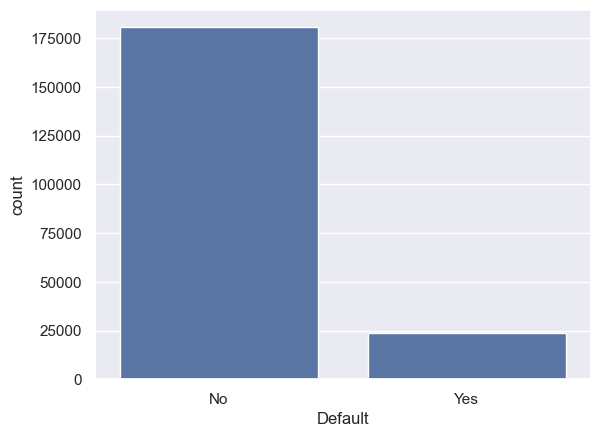

In [24]:
# Lets plot the Loan_Status column to know the propotion of accepted and rejected proposals

print(train_data[cat[-1]].value_counts())
sb.countplot(x=train_data[cat[-1]])
plt.show()

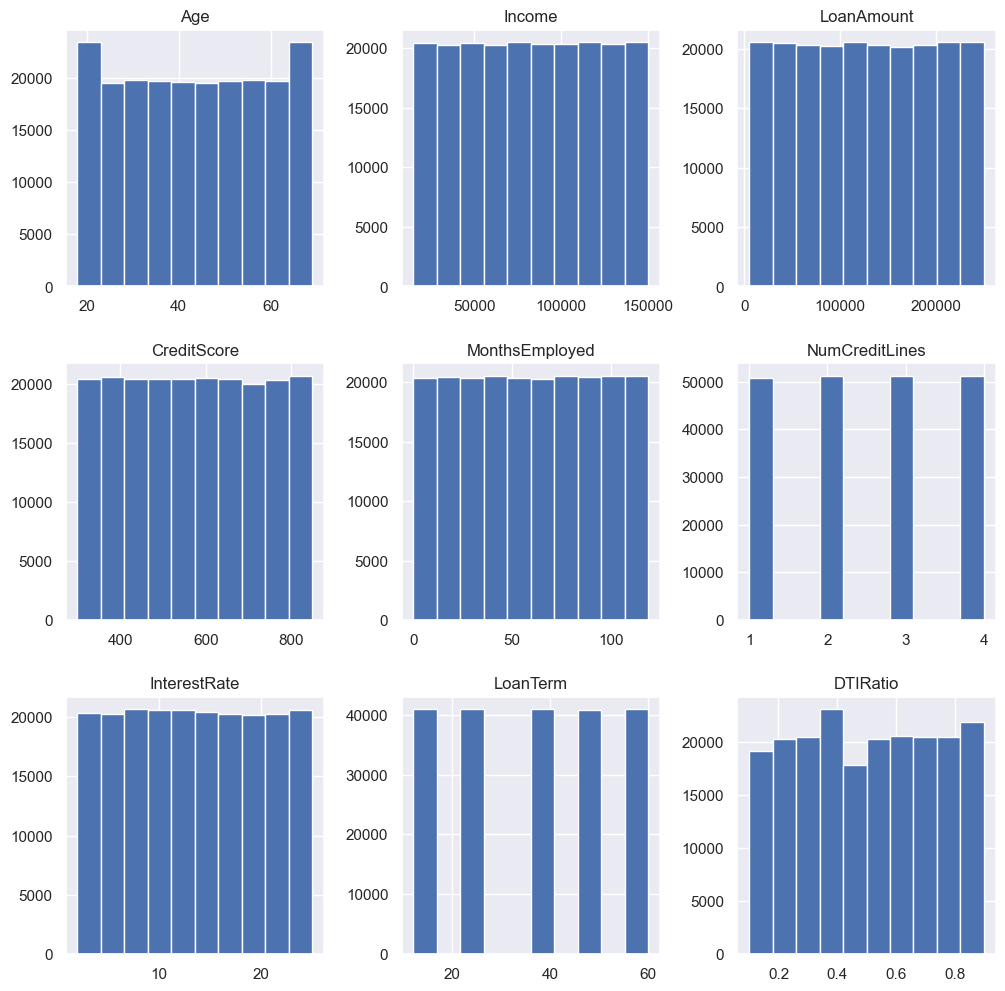

In [25]:
# plot histograms for numeric variable
train_data.hist(figsize=(12, 12))
plt.show()

The numerical columns seems to be uniformly distributed. There are no observable outliers that need to be treated. Neither are there missing or duplicated entries.

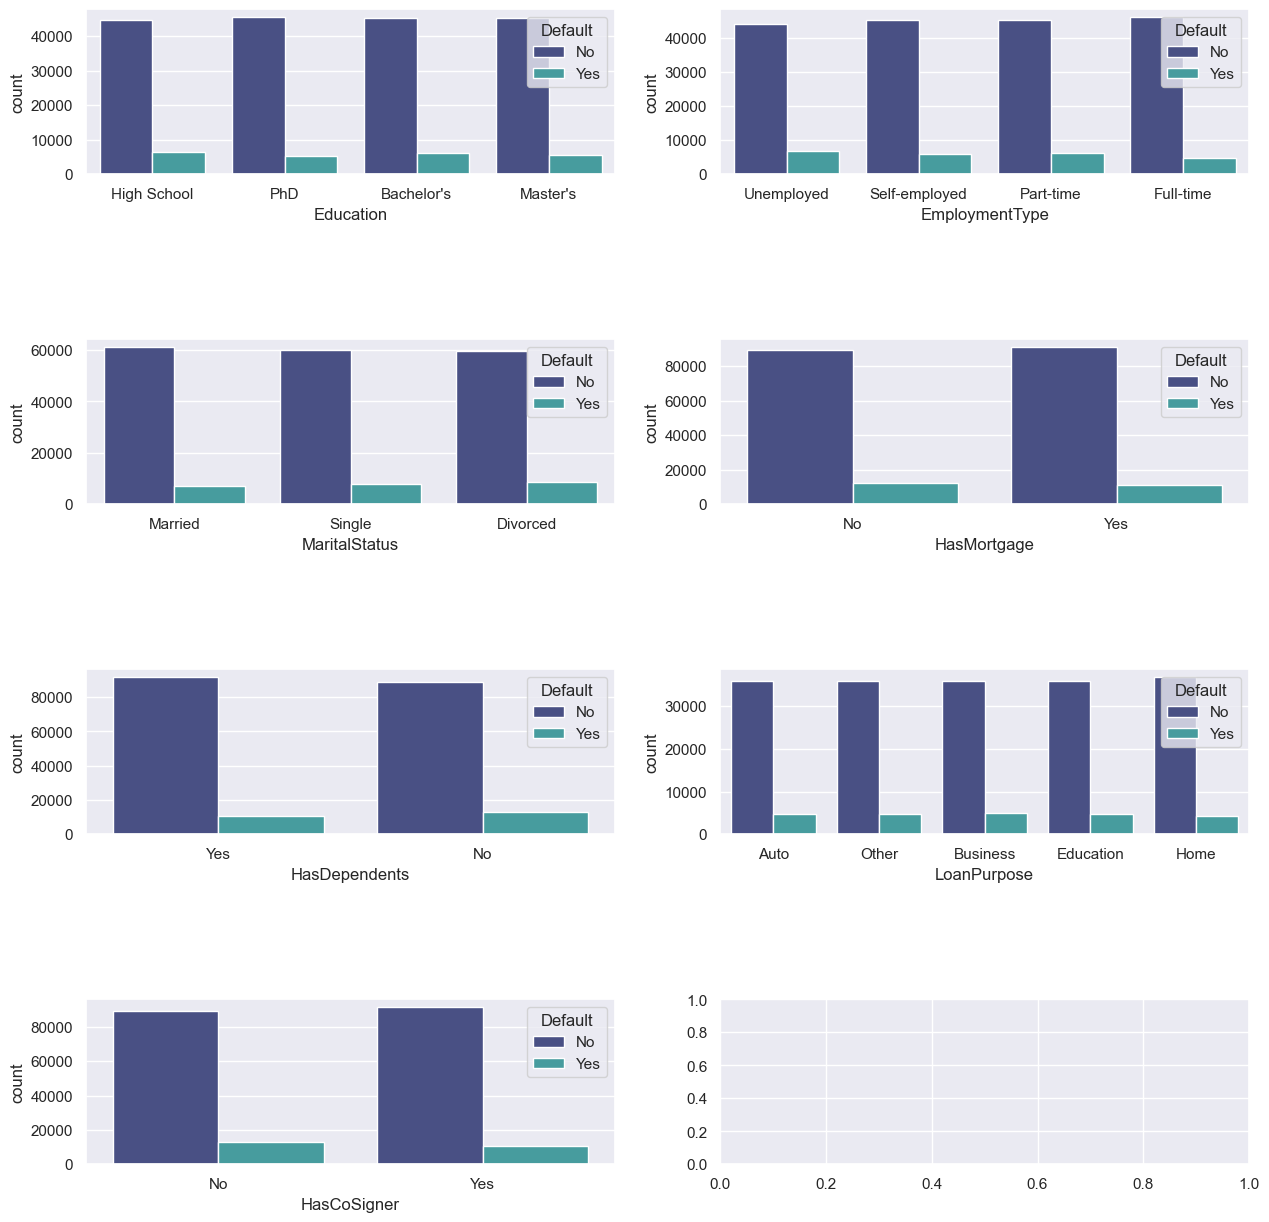

In [26]:
# Categorical Value Plots

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
for idx, cat_col in enumerate(categorical_columns):
    row, col = idx//2, idx%2
    sb.countplot(
        x=cat_col,
        data=train_data,
        hue='Default',
        ax=axes[row, col], 
        palette='mako'
        )

plt.subplots_adjust(hspace=1)

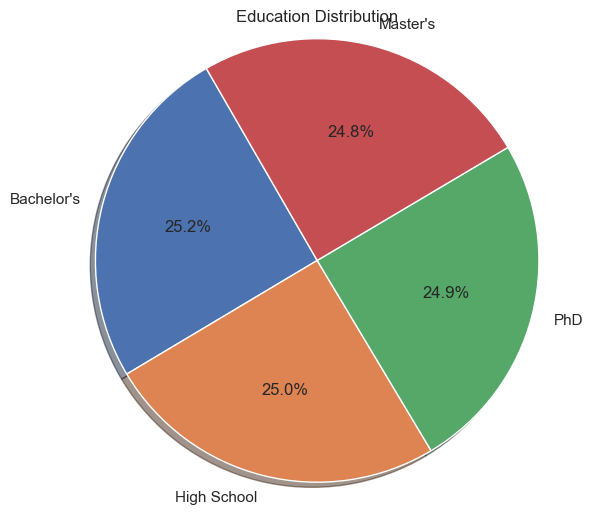

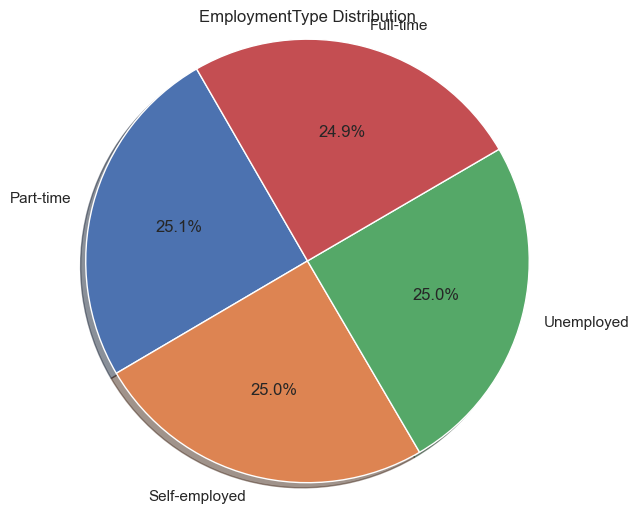

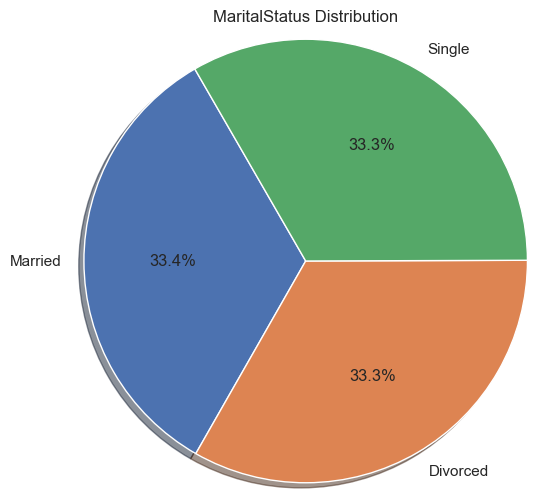

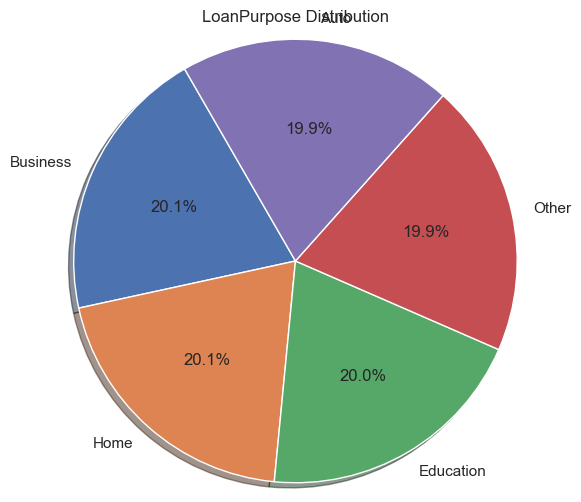

In [27]:
# List of columns you want to create pie charts for
columns = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']

# Loop through each column and create a pie chart
for column in columns:
    plt.figure(figsize=(6, 6))  # Adjust the size of the figure if needed
    plt.pie(
        train_data[column].value_counts(), 
        shadow=True, 
        autopct='%1.1f%%', 
        startangle=120, 
        radius=1.2, 
        labels=train_data[column].value_counts().index
    )
    plt.title(f'{column} Distribution')
    plt.show()

Text(0.5, 1.0, 'Loan Default Distribution')

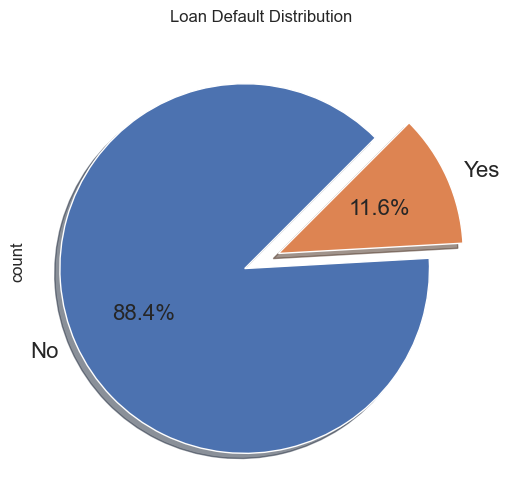

In [28]:
plt.figure(figsize=(6, 6))

train_data['Default'].value_counts().plot.pie(
    explode=[0.1, 0.1], 
    autopct='%1.1f%%', 
    shadow=True, 
    textprops={'fontsize': 16}, 
    startangle=45
    ).set_title("Loan Default Distribution")

There is a huge class imbalance in this dataset. The imbalance will be dealt with using the SMOTE algorithm.

In [29]:
train_data[numerical_columns]

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
15826,45,37039,247916,624,19,2,4.62,60,0.85
147371,48,133963,66275,494,119,3,14.72,48,0.49
178180,47,100204,6967,718,108,3,5.51,24,0.76
126915,42,36078,25966,344,2,3,18.29,36,0.76
163930,20,99464,248557,318,74,3,19.45,60,0.45
...,...,...,...,...,...,...,...,...,...
59108,18,115282,142016,601,50,3,3.43,36,0.36
71610,67,39547,94145,383,82,4,3.32,48,0.80
85645,60,48470,29331,590,42,1,12.67,12,0.83
21010,37,56697,76419,461,15,2,19.61,60,0.24


In [30]:
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    val_data[col] = le.transform(val_data[col])
    test_data[col] = le.transform(test_data[col])

In [31]:
train_data['Default'] = le.fit_transform(train_data['Default'])

In [32]:
train_data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
15826,45,37039,247916,624,19,2,4.62,60,0.85,1,3,1,0,1,0,0,0
147371,48,133963,66275,494,119,3,14.72,48,0.49,3,2,1,1,1,4,1,0
178180,47,100204,6967,718,108,3,5.51,24,0.76,1,2,2,1,1,1,1,0
126915,42,36078,25966,344,2,3,18.29,36,0.76,0,2,1,0,1,2,0,0
163930,20,99464,248557,318,74,3,19.45,60,0.45,0,1,0,0,0,0,1,1


In [33]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
Age,1.000000,-0.001023,-0.002981,-0.001388,-0.001215,-0.000535,-0.000491,0.000937,-0.004387,-0.002087,0.001133,-0.000960,-0.000422,-0.000791,0.002731,-0.002889,-0.166299
Income,-0.001023,1.000000,-0.001912,-0.000739,0.002763,-0.000985,-0.002954,-0.002404,0.001064,-0.002353,-0.002603,0.001528,-0.002040,-0.000522,-0.002139,-0.004286,-0.098759
LoanAmount,-0.002981,-0.001912,1.000000,0.001978,0.003461,0.000014,-0.000518,0.002282,0.001361,0.004519,0.001499,-0.001940,-0.000224,-0.000460,-0.000611,-0.001431,0.086372
CreditScore,-0.001388,-0.000739,0.001978,1.000000,0.000694,0.000556,0.000885,0.000783,-0.001570,0.001155,0.003758,-0.005234,0.002410,-0.003646,-0.001082,-0.002145,-0.034753
MonthsEmployed,-0.001215,0.002763,0.003461,0.000694,1.000000,0.002522,0.000720,-0.001745,-0.000916,-0.002155,0.000788,-0.000114,-0.000358,0.002192,-0.002052,-0.000382,-0.096385
NumCreditLines,-0.000535,-0.000985,0.000014,0.000556,0.002522,1.000000,-0.000363,-0.000681,-0.000348,0.004525,-0.000562,-0.001552,-0.001226,-0.002739,-0.000348,0.003008,0.028168
InterestRate,-0.000491,-0.002954,-0.000518,0.000885,0.000720,-0.000363,1.000000,0.000355,0.001175,0.004993,0.000825,-0.006078,-0.000504,0.001824,0.001823,-0.002634,0.131362
LoanTerm,0.000937,-0.002404,0.002282,0.000783,-0.001745,-0.000681,0.000355,1.000000,0.003654,-0.003348,0.001502,0.000390,0.002049,0.003053,0.003437,-0.001682,0.001182
DTIRatio,-0.004387,0.001064,0.001361,-0.001570,-0.000916,-0.000348,0.001175,0.003654,1.000000,0.001851,-0.000360,0.004270,0.000154,0.002529,-0.004471,-0.000034,0.020814
Education,-0.002087,-0.002353,0.004519,0.001155,-0.002155,0.004525,0.004993,-0.003348,0.001851,1.000000,0.000149,-0.004246,-0.000219,0.001513,-0.002942,-0.000045,-0.021802


# Model training and evaluation

In [34]:
train_X = train_data.drop('Default', axis=1)
train_y = train_data['Default']

In [35]:
# Normalization

ss = StandardScaler()
train_df = ss.fit_transform(train_X)

In [36]:
# Save the scaler as a pickle file
pickle.dump(ss, open('../predicting_loan_defaulters/saved_models/standard_scaler.pkl', 'wb'))

In [37]:
log = LogisticRegression(class_weight='balanced')
log.fit(train_X, train_y)

c:\Users\samue\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [38]:
val_y = val_data['Default']
val_X = val_data.drop('Default', axis=1)

test_y = le.transform(test_data['Default'])
test_X = test_data.drop('Default', axis=1)

In [39]:
test_X = ss.transform(test_X)

In [40]:
pred_test = log.predict(test_X)
pred_test

c:\Users\samue\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 1, ..., 0, 0, 1])

In [41]:
acc = accuracy_score(test_y, pred_test)
print(f"Accuracy is {round(acc, 2)*100}%")

Accuracy is 55.00000000000001%


These results prove that the model is basically guessing which borrowers would default or not. This is why we need to introduce the SMOTE algorithm to take care of the class imbalance issue.

In [42]:
print(confusion_matrix(test_y, pred_test))

[[11867 10703]
 [  777  2188]]


In [43]:
print(classification_report(test_y, pred_test))

              precision    recall  f1-score   support

           0       0.94      0.53      0.67     22570
           1       0.17      0.74      0.28      2965

    accuracy                           0.55     25535
   macro avg       0.55      0.63      0.47     25535
weighted avg       0.85      0.55      0.63     25535



# SMOTE to solve class imbalance problem

In [44]:
data = df.copy()

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

X = data.drop(['Default', 'LoanID'], axis=1)
y = le.transform(data['Default'])

In [45]:
# X = ss.transform(X)

In [46]:
smote = KMeansSMOTE(
    sampling_strategy='auto', 
    cluster_balance_threshold=0.1
    )

X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled.shape, y_resampled.shape)

(451391, 16) (451391,)


In [97]:
X_train, XTest, y_train, yTest = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(XTest, yTest, test_size=0.5, random_state=42)

In [98]:
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [99]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_val)
print(f"Accuracy is {round(accuracy_score(y_val, y_pred_lr), 2)*100}%")
print(confusion_matrix(y_val, y_pred_lr))
print(classification_report(y_val, y_pred_lr))

Accuracy is 88.0%
[[19801  2915]
 [ 2284 20139]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     22716
           1       0.87      0.90      0.89     22423

    accuracy                           0.88     45139
   macro avg       0.89      0.88      0.88     45139
weighted avg       0.89      0.88      0.88     45139



In [95]:
pd.crosstab(y_val, y_pred_lr, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,19760,2956,22716
1,2322,20101,22423
All,22082,23057,45139


In [76]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_val)
print(f"Accuracy is {round(accuracy_score(y_val, y_pred_gnb), 2)*100}%")
print(confusion_matrix(y_val, y_pred_gnb))
print(classification_report(y_val, y_pred_gnb))

Accuracy is 89.0%
[[20129  2587]
 [ 2405 20018]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     22716
           1       0.89      0.89      0.89     22423

    accuracy                           0.89     45139
   macro avg       0.89      0.89      0.89     45139
weighted avg       0.89      0.89      0.89     45139



In [48]:
pd.crosstab(y_val, y_pred_gnb, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,20208,2508,22716
1,2347,20076,22423
All,22555,22584,45139


In [49]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_val)
print(f"Accuracy is {round(accuracy_score(y_val, y_pred_dtc), 2)*100}%")
print(confusion_matrix(y_val, y_pred_dtc))
print(classification_report(y_val, y_pred_dtc))

Accuracy is 88.0%
[[19665  3051]
 [ 2355 20068]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     22716
           1       0.87      0.89      0.88     22423

    accuracy                           0.88     45139
   macro avg       0.88      0.88      0.88     45139
weighted avg       0.88      0.88      0.88     45139



In [50]:
pd.crosstab(y_val, y_pred_dtc, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,19665,3051,22716
1,2355,20068,22423
All,22020,23119,45139


In [51]:
svc = LinearSVC()
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_val)
print(f"Accuracy is {round(accuracy_score(y_val, y_pred_svc), 2)*100}%")
print(confusion_matrix(y_val, y_pred_svc))
print(classification_report(y_val, y_pred_svc))

c:\Users\samue\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy is 88.0%
[[19628  3088]
 [ 2256 20167]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     22716
           1       0.87      0.90      0.88     22423

    accuracy                           0.88     45139
   macro avg       0.88      0.88      0.88     45139
weighted avg       0.88      0.88      0.88     45139



In [52]:
pd.crosstab(y_val, y_pred_svc, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,19628,3088,22716
1,2256,20167,22423
All,21884,23255,45139


In [53]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = lr.predict(X_val)
print(f"Accuracy is {round(accuracy_score(y_val, y_pred_rf), 2)*100}%")
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

Accuracy is 88.0%
[[19760  2956]
 [ 2341 20082]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     22716
           1       0.87      0.90      0.88     22423

    accuracy                           0.88     45139
   macro avg       0.88      0.88      0.88     45139
weighted avg       0.88      0.88      0.88     45139



In [54]:
pd.crosstab(y_val, y_pred_rf, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,19760,2956,22716
1,2341,20082,22423
All,22101,23038,45139


In [55]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_val)
print(f"Accuracy is {round(accuracy_score(y_val, y_pred_gbc), 2)*100}%")
print(confusion_matrix(y_val, y_pred_gbc))
print(classification_report(y_val, y_pred_gbc))

Accuracy is 91.0%
[[21181  1535]
 [ 2439 19984]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     22716
           1       0.93      0.89      0.91     22423

    accuracy                           0.91     45139
   macro avg       0.91      0.91      0.91     45139
weighted avg       0.91      0.91      0.91     45139



In [56]:
pd.crosstab(y_val, y_pred_gbc, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,21181,1535,22716
1,2439,19984,22423
All,23620,21519,45139


In [63]:
model = GradientBoostingClassifier()

parameters = {
    "learning_rate": sp_randFloat(),
    "subsample"    : sp_randFloat(),
    "n_estimators" : sp_randInt(100, 1000),
    "max_depth"    : sp_randInt(4, 10)
    }

In [64]:
randm = RandomizedSearchCV(
    estimator=model,
    param_distributions=parameters,
    cv=7,
    n_iter=10,
    n_jobs=-1,
    random_state=42
    )
randm.fit(X_train, y_train)

print(" Results from Random Search ")
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

 Results from Random Search 
The best estimator across ALL searched params: GradientBoostingClassifier(learning_rate=0.04666566321361543, max_depth=7,
                           n_estimators=882, subsample=0.45606998421703593)
The best score across ALL searched params: 0.9261198740599733
The best parameters across ALL searched params: {'learning_rate': 0.04666566321361543, 'max_depth': 7, 'n_estimators': 882, 'subsample': 0.45606998421703593}


In [57]:
final_model = GradientBoostingClassifier(
    learning_rate=0.04666566321361543,
    max_depth=7,
    n_estimators=882,
    subsample=0.45606998421703593
    )
final_model.fit(X_train, y_train)

pred = final_model.predict(X_val)
print(f"Accuracy is {round(accuracy_score(y_val, pred), 2)*100}%")
print(confusion_matrix(y_val, pred))
pd.crosstab(y_val, pred, rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(y_val, pred))

Accuracy is 93.0%
[[21875   841]
 [ 2496 19927]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     22716
           1       0.96      0.89      0.92     22423

    accuracy                           0.93     45139
   macro avg       0.93      0.93      0.93     45139
weighted avg       0.93      0.93      0.93     45139



In [58]:
with open('saved_models/trained_loan_prediction_model.pkl', 'wb') as final_model_file:
    pickle.dump(final_model, final_model_file)